In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [2]:
data=pd.read_csv(r'D:\ESPRIT\4DS\Pi_Ds\FeaturesExtraction\Data\amine_final.csv')

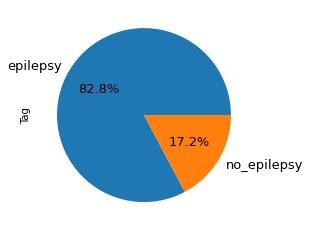

In [3]:
data['Tag'].value_counts().plot.pie(autopct='%.1f%%',labels=['epilepsy','no_epilepsy'],fontsize=13)
plt.show()

In [4]:
ds=data[['0_Absolute energy','0_Area under the curve','0_Autocorrelation','0_Centroid','0_Entropy','0_HFD','0_Mean absolute diff','0_Mean diff','0_Median absolute diff','0_Median diff','0_Negative turning points','0_Neighbourhood peaks','0_PFD','0_Peak to peak distance','0_Positive turning points','0_SPECTRAL_ENTROPY','0_SVD_ENTROPY','0_Signal distance','0_Slope','0_Sum absolute diff','0_Total energy','0_Zero crossing rate','Tag']]

In [5]:
encode = ({'no_epilepsy': 0, 'epilepsy': 1} )
df_encoded = ds.replace(encode)

In [6]:
X=df_encoded.iloc[:,:-1]
Y=df_encoded.iloc[:,-1]
print(X.shape)
print(Y.shape)

(506637, 22)
(506637,)


In [7]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
clusters = RandomOverSampler(sampling_strategy='minority',random_state =1)#RandomOverSampler => pour le oversampling
clusters.fit(X,Y)
X_Sampled,Y_Sampled = clusters.fit_resample(X,Y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Sampled,Y_Sampled,test_size=0.25,random_state=1)
X_train.shape, X_test.shape,y_train ,y_test 

((629145, 22),
 (209715, 22),
 742758    0
 576531    0
 85316     1
 315341    1
 418388    1
          ..
 491263    0
 791624    0
 470924    0
 491755    0
 128037    1
 Name: Tag, Length: 629145, dtype: int64,
 804502    0
 793815    0
 64656     1
 761135    0
 158110    1
          ..
 673607    0
 135128    1
 264601    1
 402938    1
 811773    0
 Name: Tag, Length: 209715, dtype: int64)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
#vérification_Centrage Réduction 
import numpy as np
#moyenne
print(np.mean(X_train,axis=0))
#écart-type
print(np.std(X_test,axis=0,ddof=0))

[-1.76183021e-17 -3.48074404e-17 -3.92571911e-17 -3.50559037e-17
 -6.26375815e-16 -6.63374249e-16 -2.70373175e-17 -2.98155882e-18
  1.72794886e-17  4.15046540e-18 -3.10014354e-16  2.82615636e-16
  1.08440649e-14 -1.58000030e-17 -1.03552700e-16 -3.33166610e-17
  9.61259080e-16 -1.43076198e-10  1.69406751e-18 -1.66018616e-17
  3.44234518e-17 -4.00251684e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Noyeau polynomial

In [11]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report,confusion_matrix 
model =SVC(kernel='poly',degree=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[80146 24733]
 [15073 89763]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80    104879
           1       0.78      0.86      0.82    104836

    accuracy                           0.81    209715
   macro avg       0.81      0.81      0.81    209715
weighted avg       0.81      0.81      0.81    209715



# Noyeau Gaussien RBF

In [12]:
# from sklearn.model_selection import GridSearchCV 
  
# # defining parameter range 
# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 10, 100, 1000,10000], 
#               'kernel': ['rbf']}  
  
# grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# # fitting the model for grid search 
# grid.fit(X_train, y_train)

In [13]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report,confusion_matrix 
model2 =SVC(kernel='rbf')
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[95009  9870]
 [16868 87968]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88    104879
           1       0.90      0.84      0.87    104836

    accuracy                           0.87    209715
   macro avg       0.87      0.87      0.87    209715
weighted avg       0.87      0.87      0.87    209715



# Noyeau Sigmoide

In [15]:
# Kernel sigmoid
model3 = SVC(kernel="sigmoid")
model3.fit(X_train, y_train)
# from sklearn.metrics import classification_report
y_pred_svc_3 = model3.predict(X_test)
print(classification_report(y_pred_svc_3, y_test))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61    104461
           1       0.61      0.61      0.61    105254

    accuracy                           0.61    209715
   macro avg       0.61      0.61      0.61    209715
weighted avg       0.61      0.61      0.61    209715



In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score

s1=accuracy_score(y_test, y_pred)
s2=accuracy_score(y_test, y_pred2)
s3=accuracy_score(y_test, y_pred_svc_3)

models = pd.DataFrame({
    'Model': ['Support Vector Machines polynomiale','Support Vector Machines RBF', 
              'Support Vector Machines sigmoïde'],
    'Score': [s1,s2, s3 
              ]})
models.sort_values(by="Score",ascending=False)

,Model,Score
1,Support Vector Machines RBF,0.872503
0,Support Vector Machines polynomiale,0.810190
2,Support Vector Machines sigmoïde,0.609794
